In [1]:
%pip install shap
%pip install xgboost
%pip install lightgbm

In [2]:
# Load data from the specified paths
import numpy as np
import pandas as pd
train_path = '/content/drive/MyDrive/Research/Anti-Viral_Peptides/aactrainpos.csv'
test_path = '/content/drive/MyDrive/Research/Anti-Viral_Peptides/aactestpos.csv'

try:
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
except FileNotFoundError:
    print("Error: Dataset files not found. Please check the paths.")
    exit()

# Check for and drop null values, remove duplicates, and handle overlaps
print("Initial data shapes:")
print(f"Train data: {train_data.shape}")
print(f"Test data: {test_data.shape}")
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

# Identify and remove overlapping rows between the initial train and test sets
common_rows = pd.merge(train_data, test_data, on=list(train_data.columns), how='inner')
print(f"\nFound {len(common_rows)} overlapping rows between train_data and test_data.")
if not common_rows.empty:
    test_data = pd.concat([test_data, common_rows, common_rows]).drop_duplicates(keep=False)
    print(f"Removed overlapping rows from test_data. New test_data shape: {test_data.shape}")

# Combine and re-split for a clean internal validation set
AAC_full_data = pd.concat([train_data, test_data], ignore_index=True).drop_duplicates()

Initial data shapes:
Train data: (17898, 21)
Test data: (7909, 21)

Found 575 overlapping rows between train_data and test_data.
Removed overlapping rows from test_data. New test_data shape: (7290, 21)


In [3]:
AAC_full_data

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,Target
0,0.00,0.00,4.55,9.09,0.00,4.55,4.55,9.09,9.09,4.55,...,4.55,9.09,0.00,0.00,9.09,18.18,0.00,4.55,9.09,1
1,7.69,0.00,0.00,0.00,15.38,0.00,0.00,0.00,30.77,0.00,...,0.00,0.00,0.00,0.00,0.00,7.69,30.77,0.00,7.69,1
2,0.00,0.00,0.00,0.00,0.00,0.00,6.67,13.33,6.67,33.33,...,0.00,0.00,0.00,20.00,0.00,0.00,13.33,0.00,6.67,1
3,6.67,0.00,6.67,0.00,10.00,13.33,3.33,16.67,6.67,3.33,...,3.33,0.00,3.33,0.00,10.00,6.67,0.00,3.33,0.00,1
4,8.70,0.00,0.00,4.35,0.00,0.00,0.00,17.39,13.04,4.35,...,17.39,0.00,0.00,0.00,4.35,17.39,8.70,4.35,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25046,4.55,0.00,0.00,2.27,6.82,2.27,6.82,0.00,2.27,4.55,...,6.82,15.91,9.09,11.36,0.00,2.27,4.55,11.36,0.00,0
25047,0.00,5.41,5.41,2.70,5.41,8.11,2.70,8.11,5.41,5.41,...,8.11,5.41,0.00,5.41,5.41,2.70,8.11,8.11,2.70,0
25048,8.51,6.38,4.26,6.38,4.26,0.00,2.13,0.00,8.51,0.00,...,4.26,6.38,6.38,6.38,8.51,4.26,4.26,8.51,10.64,0
25049,7.32,7.32,4.88,0.00,7.32,9.76,0.00,0.00,0.00,4.88,...,9.76,9.76,4.88,2.44,9.76,7.32,7.32,4.88,2.44,0


In [4]:
# Load data from the specified paths
train_file_path = '/content/drive/MyDrive/Research/Anti-Viral_Peptides/paactrainpos.csv'
test_file_path = '/content/drive/MyDrive/Research/Anti-Viral_Peptides/paactestpos.csv'

try:
    train_data = pd.read_csv(train_file_path)
    test_data = pd.read_csv(test_file_path)
except FileNotFoundError:
    print("Error: Dataset files not found. Please check the paths.")
    exit()

train_data['Target'].fillna(0, inplace=True)
test_data['Target'].fillna(0, inplace=True)

# Check for and drop null values, remove duplicates, and handle overlaps
print("Initial data shapes:")
print(f"Train data: {train_data.shape}")
print(f"Test data: {test_data.shape}")
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

# Identify and remove overlapping rows between the initial train and test sets
common_rows = pd.merge(train_data, test_data, on=list(train_data.columns), how='inner')
print(f"\nFound {len(common_rows)} overlapping rows between train_data and test_data.")
if not common_rows.empty:
    test_data = pd.concat([test_data, common_rows, common_rows]).drop_duplicates(keep=False)
    print(f"Removed overlapping rows from test_data. New test_data shape: {test_data.shape}")

# Combine and re-split for a clean internal validation set
PAAC_full_data = pd.concat([train_data, test_data], ignore_index=True).drop_duplicates()

Initial data shapes:
Train data: (17898, 23)
Test data: (7909, 23)

Found 549 overlapping rows between train_data and test_data.
Removed overlapping rows from test_data. New test_data shape: (7359, 23)


/tmp/ipython-input-2563406386.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Target'].fillna(0, inplace=True)
/tmp/ipython-input-2563406386.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [5]:
PAAC_full_data

,PAAC2_A,PAAC2_C,PAAC2_D,PAAC2_E,PAAC2_F,PAAC2_G,PAAC2_H,PAAC2_I,PAAC2_K,PAAC2_L,...,PAAC2_Q,PAAC2_R,PAAC2_S,PAAC2_T,PAAC2_V,PAAC2_W,PAAC2_Y,PAAC2_lam1,PAAC2_lam2,Target
0,0.00,0.00,4.55,9.09,0.00,4.55,4.55,9.09,9.09,4.55,...,0.00,0.00,9.09,18.18,0.00,4.55,9.09,0.0740,0.0774,1.0
1,7.69,0.00,0.00,0.00,15.38,0.00,0.00,0.00,30.77,0.00,...,0.00,0.00,0.00,7.69,30.77,0.00,7.69,0.0325,0.0684,1.0
2,0.00,0.00,0.00,0.00,0.00,0.00,6.67,13.33,6.67,33.33,...,0.00,20.00,0.00,0.00,13.33,0.00,6.67,0.1025,0.1198,1.0
3,6.67,0.00,6.67,0.00,10.00,13.33,3.33,16.67,6.67,3.33,...,3.33,0.00,10.00,6.67,0.00,3.33,0.00,0.0990,0.0599,1.0
4,8.70,0.00,0.00,4.35,0.00,0.00,0.00,17.39,13.04,4.35,...,0.00,0.00,4.35,17.39,8.70,4.35,0.00,0.0773,0.0782,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25251,4.55,0.00,0.00,2.27,6.82,2.27,6.82,0.00,2.27,4.55,...,9.09,11.36,0.00,2.27,4.55,11.36,0.00,0.0940,0.0882,0.0
25252,0.00,5.41,5.41,2.70,5.41,8.11,2.70,8.11,5.41,5.41,...,0.00,5.41,5.41,2.70,8.11,8.11,2.70,0.0925,0.0985,0.0
25253,8.51,6.38,4.26,6.38,4.26,0.00,2.13,0.00,8.51,0.00,...,6.38,6.38,8.51,4.26,4.26,8.51,10.64,0.0868,0.0935,0.0
25254,7.32,7.32,4.88,0.00,7.32,9.76,0.00,0.00,0.00,4.88,...,4.88,2.44,9.76,7.32,7.32,4.88,2.44,0.0702,0.0661,0.0


In [6]:

# Load data from the specified paths
train_file_path = '/content/drive/MyDrive/Research/Anti-Viral_Peptides/qostrainpos.csv'
test_file_path = '/content/drive/MyDrive/Research/Anti-Viral_Peptides/qostestpos.csv'

try:
    train_data = pd.read_csv(train_file_path)
    test_data = pd.read_csv(test_file_path)
except FileNotFoundError:
    print("Error: Dataset files not found. Please check the paths.")
    exit()

train_data['Target'].fillna(0, inplace=True)
test_data['Target'].fillna(0, inplace=True)

# Check for and drop null values, remove duplicates, and handle overlaps
print("Initial data shapes:")
print(f"Train data: {train_data.shape}")
print(f"Test data: {test_data.shape}")
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

# Identify and remove overlapping rows between the initial train and test sets
common_rows = pd.merge(train_data, test_data, on=list(train_data.columns), how='inner')
print(f"\nFound {len(common_rows)} overlapping rows between train_data and test_data.")
if not common_rows.empty:
    test_data = pd.concat([test_data, common_rows, common_rows]).drop_duplicates(keep=False)
    print(f"Removed overlapping rows from test_data. New test_data shape: {test_data.shape}")

# Combine and re-split for a clean internal validation set
QSO_full_data = pd.concat([train_data, test_data], ignore_index=True).drop_duplicates()

/tmp/ipython-input-2881518695.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Target'].fillna(0, inplace=True)
/tmp/ipython-input-2881518695.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Initial data shapes:
Train data: (17898, 45)
Test data: (7909, 45)

Found 549 overlapping rows between train_data and test_data.
Removed overlapping rows from test_data. New test_data shape: (7359, 45)


In [7]:
QSO_full_data

,QSO2_SC_A,QSO2_SC_C,QSO2_SC_D,QSO2_SC_E,QSO2_SC_F,QSO2_SC_G,QSO2_SC_H,QSO2_SC_I,QSO2_SC_K,QSO2_SC_L,...,QSO2_G_S,QSO2_G_T,QSO2_G_V,QSO2_G_W,QSO2_G_Y,QSO2_SC1,QSO2_SC2,QSO2_G1,QSO2_G2,Target
0,0.0000,0.0000,0.5663,1.1325,0.0000,0.5663,0.5663,1.1325,1.1325,0.5663,...,0.0001,0.0002,0.0000,0.0001,0.0001,0.2151,0.2187,0.2151,0.2187,1.0
1,0.8398,0.0000,0.0000,0.0000,1.6796,0.0000,0.0000,0.0000,3.3593,0.0000,...,0.0000,0.0002,0.0010,0.0000,0.0002,0.0564,0.1038,0.0564,0.1038,1.0
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6435,1.2870,0.6435,3.2174,...,0.0000,0.0000,0.0003,0.0000,0.0001,0.1760,0.1805,0.1760,0.1805,1.0
3,1.0285,0.0000,1.0285,0.0000,1.5428,2.0570,0.5143,2.5713,1.0285,0.5143,...,0.0001,0.0001,0.0000,0.0000,0.0000,0.3054,0.1803,0.3054,0.1803,1.0
4,1.1168,0.0000,0.0000,0.5584,0.0000,0.0000,0.0000,2.2336,1.6752,0.5584,...,0.0000,0.0002,0.0001,0.0000,0.0000,0.2176,0.2240,0.2176,0.2240,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25252,0.7798,0.0000,0.0000,0.3899,1.1697,0.3899,1.1697,0.0000,0.3899,0.7798,...,0.0000,0.0000,0.0001,0.0001,0.0000,0.3347,0.2754,0.3347,0.2754,0.0
25253,0.0000,0.8154,0.8154,0.4077,0.8154,1.2231,0.4077,1.2231,0.8154,0.8154,...,0.0000,0.0000,0.0001,0.0001,0.0000,0.2941,0.2982,0.2941,0.2982,0.0
25254,1.3929,1.0447,0.6964,1.0447,0.6964,0.0000,0.3482,0.0000,1.3929,0.0000,...,0.0001,0.0000,0.0000,0.0001,0.0001,0.3263,0.3255,0.3263,0.3255,0.0
25255,1.5718,1.5718,1.0479,0.0000,1.5718,2.0958,0.0000,0.0000,0.0000,1.0479,...,0.0001,0.0001,0.0001,0.0000,0.0000,0.2446,0.2315,0.2446,0.2315,0.0


In [12]:
# Merge the dataframes column-wise
# Drop the 'Target' column from PAAC_full_data and QSO_full_data to avoid duplicate columns
PAAC_features = PAAC_full_data.drop('Target', axis=1)
QSO_features = QSO_full_data.drop('Target', axis=1)

# Concatenate the dataframes column-wise, resetting the index to avoid alignment issues
# and ensuring the 'Target' column from AAC_full_data is kept
merged_full_data = pd.concat([AAC_full_data.reset_index(drop=True), PAAC_features.reset_index(drop=True), QSO_features.reset_index(drop=True)], axis=1)

# Display the shape of the merged dataframe
print("Shape of the merged dataframe:", merged_full_data.shape)

# Display the first few rows of the merged dataframe
display(merged_full_data.head())

Shape of the merged dataframe: (25257, 87)


,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSO2_G_R,QSO2_G_S,QSO2_G_T,QSO2_G_V,QSO2_G_W,QSO2_G_Y,QSO2_SC1,QSO2_SC2,QSO2_G1,QSO2_G2
0,0.00,0.0,4.55,9.09,0.00,4.55,4.55,9.09,9.09,4.55,...,0.0000,0.0001,0.0002,0.0000,0.0001,0.0001,0.2151,0.2187,0.2151,0.2187
1,7.69,0.0,0.00,0.00,15.38,0.00,0.00,0.00,30.77,0.00,...,0.0000,0.0000,0.0002,0.0010,0.0000,0.0002,0.0564,0.1038,0.0564,0.1038
2,0.00,0.0,0.00,0.00,0.00,0.00,6.67,13.33,6.67,33.33,...,0.0004,0.0000,0.0000,0.0003,0.0000,0.0001,0.1760,0.1805,0.1760,0.1805
3,6.67,0.0,6.67,0.00,10.00,13.33,3.33,16.67,6.67,3.33,...,0.0000,0.0001,0.0001,0.0000,0.0000,0.0000,0.3054,0.1803,0.3054,0.1803
4,8.70,0.0,0.00,4.35,0.00,0.00,0.00,17.39,13.04,4.35,...,0.0000,0.0000,0.0002,0.0001,0.0000,0.0000,0.2176,0.2240,0.2176,0.2240


In [9]:
# Drop null values
merged_full_data.dropna(inplace=True)

# Drop duplicate values
merged_full_data.drop_duplicates(inplace=True)

# Display the shape of the cleaned dataframe
print("Shape of the dataframe after dropping nulls and duplicates:", merged_full_data.shape)

# Display the first few rows of the cleaned dataframe
display(merged_full_data.head())

Shape of the dataframe after dropping nulls and duplicates: (25051, 89)


,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,QSO2_G_S,QSO2_G_T,QSO2_G_V,QSO2_G_W,QSO2_G_Y,QSO2_SC1,QSO2_SC2,QSO2_G1,QSO2_G2,Target
0,0.00,0.0,4.55,9.09,0.00,4.55,4.55,9.09,9.09,4.55,...,0.0001,0.0002,0.0000,0.0001,0.0001,0.2151,0.2187,0.2151,0.2187,1.0
1,7.69,0.0,0.00,0.00,15.38,0.00,0.00,0.00,30.77,0.00,...,0.0000,0.0002,0.0010,0.0000,0.0002,0.0564,0.1038,0.0564,0.1038,1.0
2,0.00,0.0,0.00,0.00,0.00,0.00,6.67,13.33,6.67,33.33,...,0.0000,0.0000,0.0003,0.0000,0.0001,0.1760,0.1805,0.1760,0.1805,1.0
3,6.67,0.0,6.67,0.00,10.00,13.33,3.33,16.67,6.67,3.33,...,0.0001,0.0001,0.0000,0.0000,0.0000,0.3054,0.1803,0.3054,0.1803,1.0
4,8.70,0.0,0.00,4.35,0.00,0.00,0.00,17.39,13.04,4.35,...,0.0000,0.0002,0.0001,0.0000,0.0000,0.2176,0.2240,0.2176,0.2240,1.0


In [10]:
merged_full_data.shape

(25051, 89)


Final internal train set shape: (20040, 87)
Final internal test set shape: (5011, 87)

Final internal train set class counts:
 Target
1.0    10242
0.0     9798
Name: count, dtype: int64

--- Applying SMOTE to the internal training data ---
Original training data shape: (20040, 87)
SMOTE-resampled training data shape: (20484, 87)
SMOTE-resampled class counts:
 Target
0.0    10242
1.0    10242
Name: count, dtype: int64
--- Processing Model: RandomForestClassifier (Internal Validation with SMOTE) ---


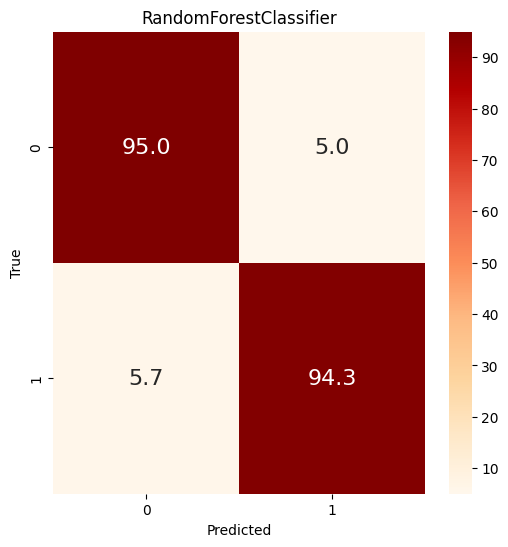

Generating learning curve for RandomForestClassifier...


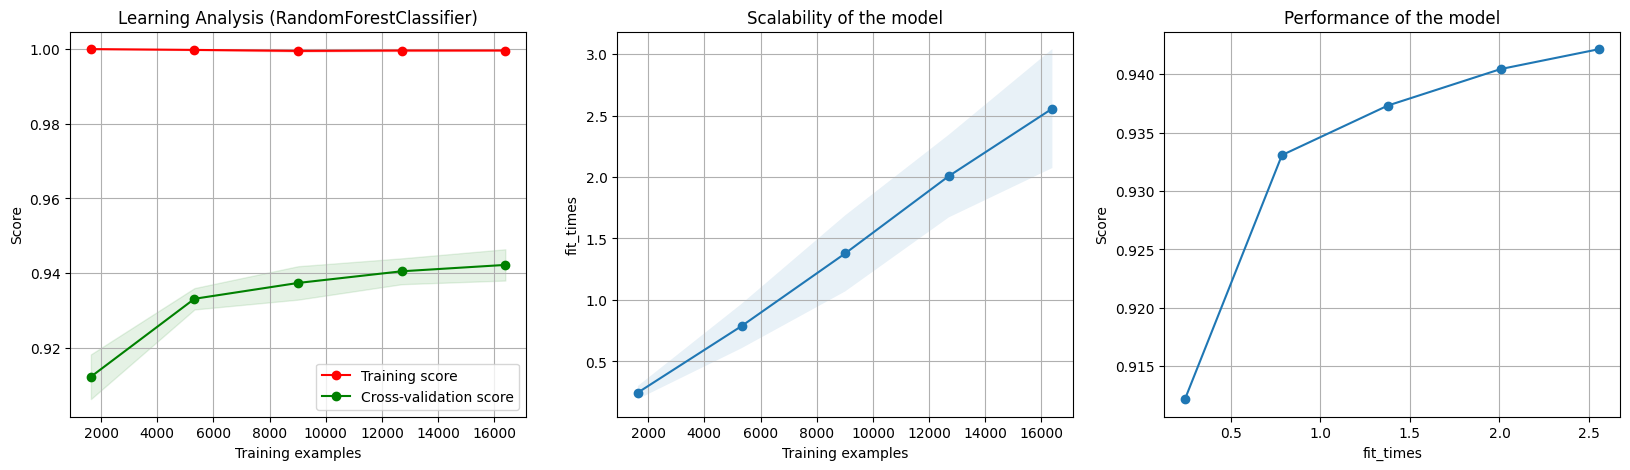

--------------------------------------------------

--- Processing Model: LogisticRegression (Internal Validation with SMOTE) ---


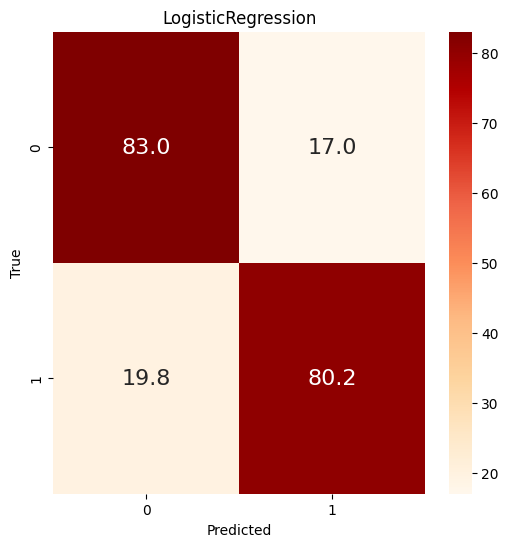

Generating learning curve for LogisticRegression...


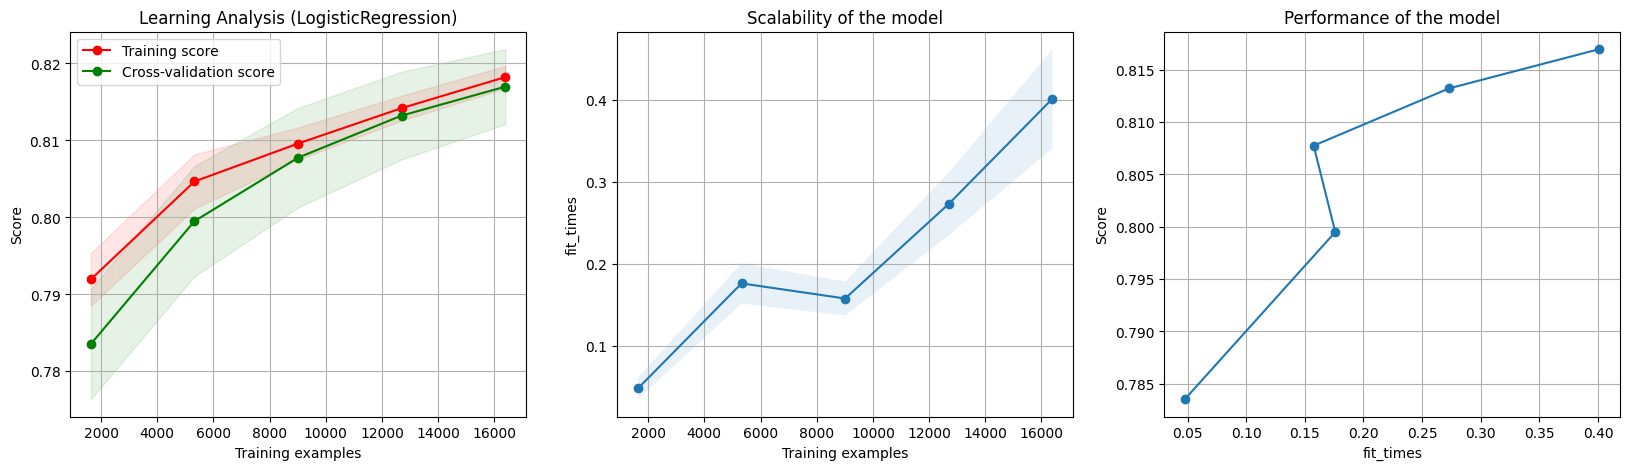

--------------------------------------------------

--- Processing Model: XGBClassifier (Internal Validation with SMOTE) ---


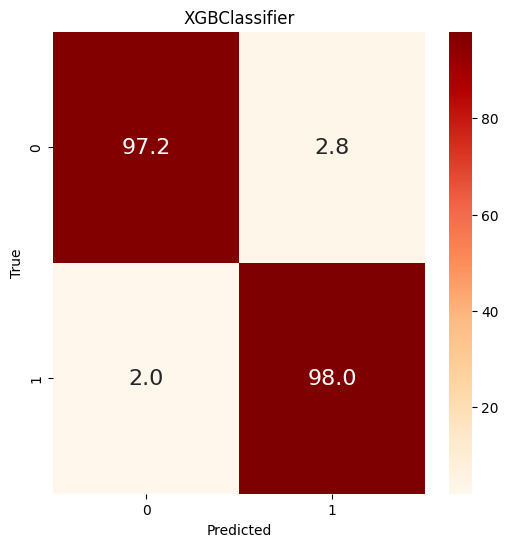

Generating learning curve for XGBClassifier...


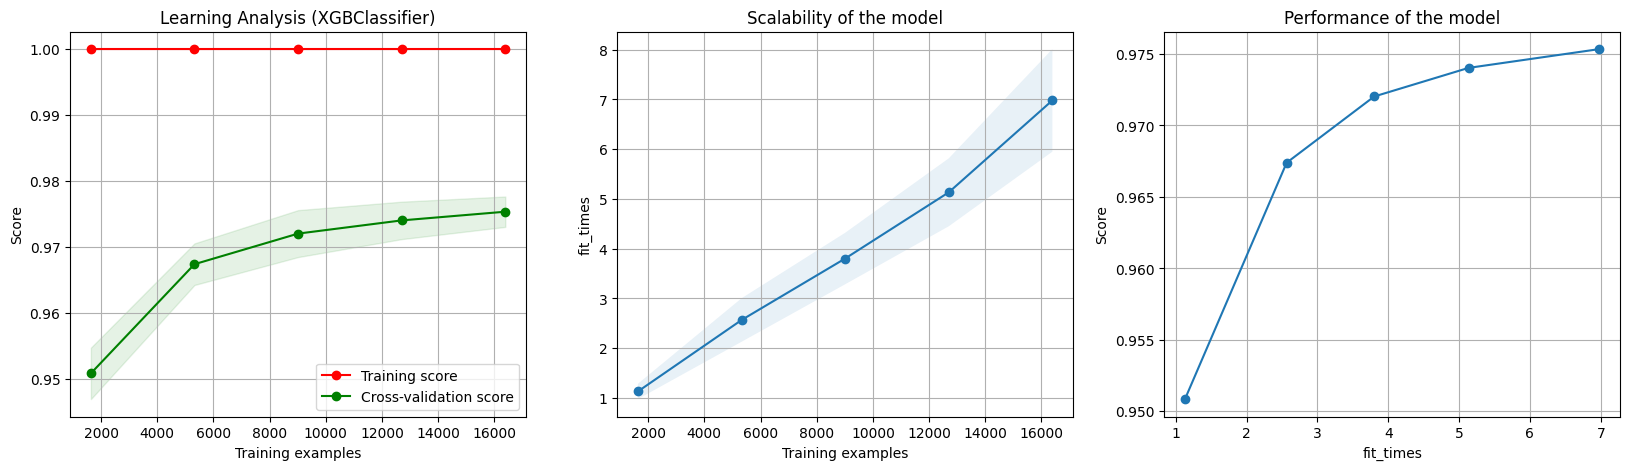

--------------------------------------------------

--- Processing Model: KNeighborsClassifier (Internal Validation with SMOTE) ---


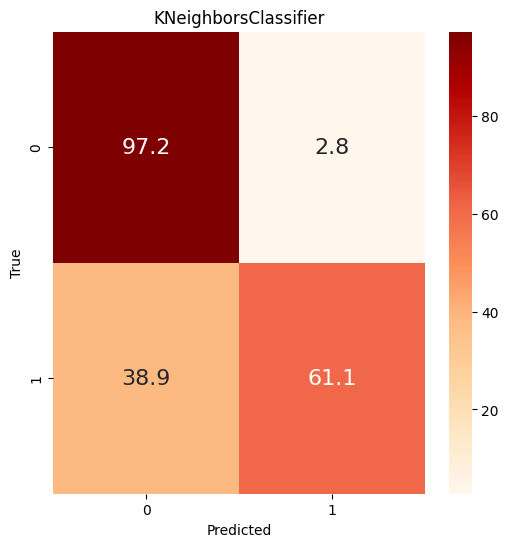

Generating learning curve for KNeighborsClassifier...


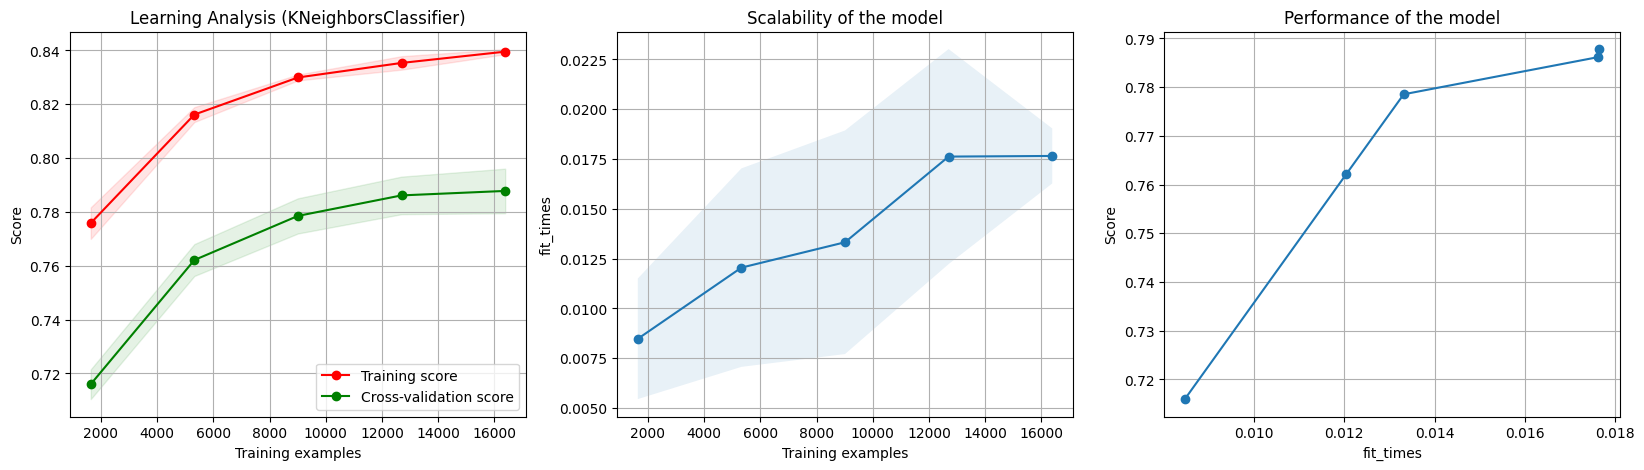

--------------------------------------------------

--- Processing Model: MLPClassifier (Internal Validation with SMOTE) ---


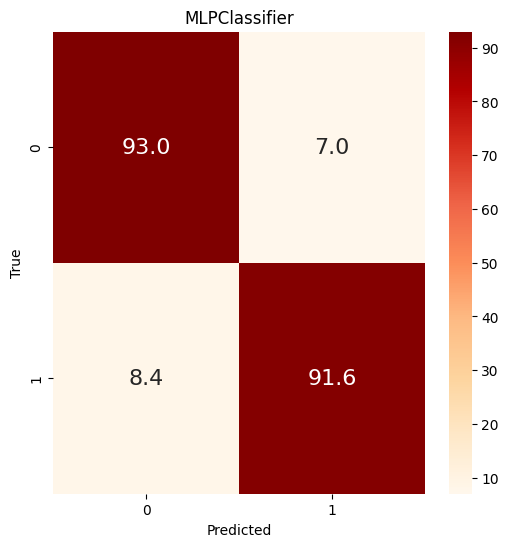

Generating learning curve for MLPClassifier...


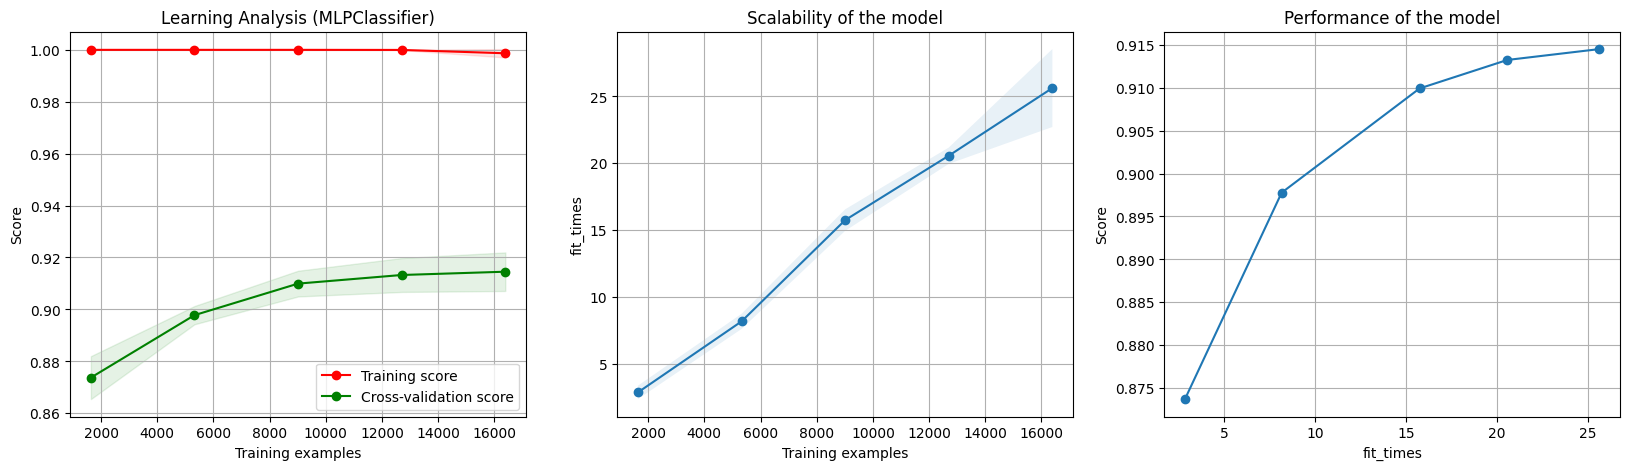

--------------------------------------------------

--- Processing Model: SVC (Internal Validation with SMOTE) ---


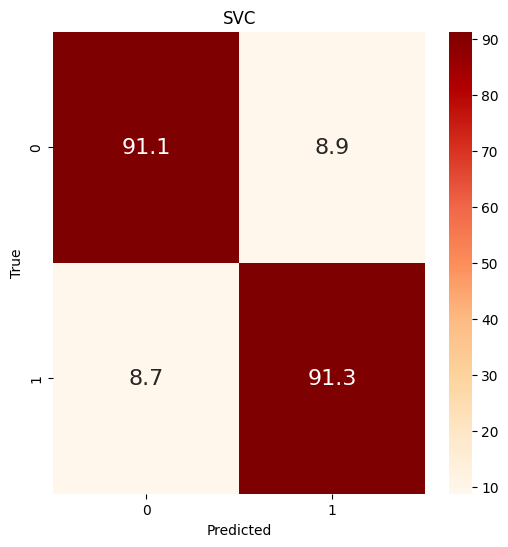

Generating learning curve for SVC...


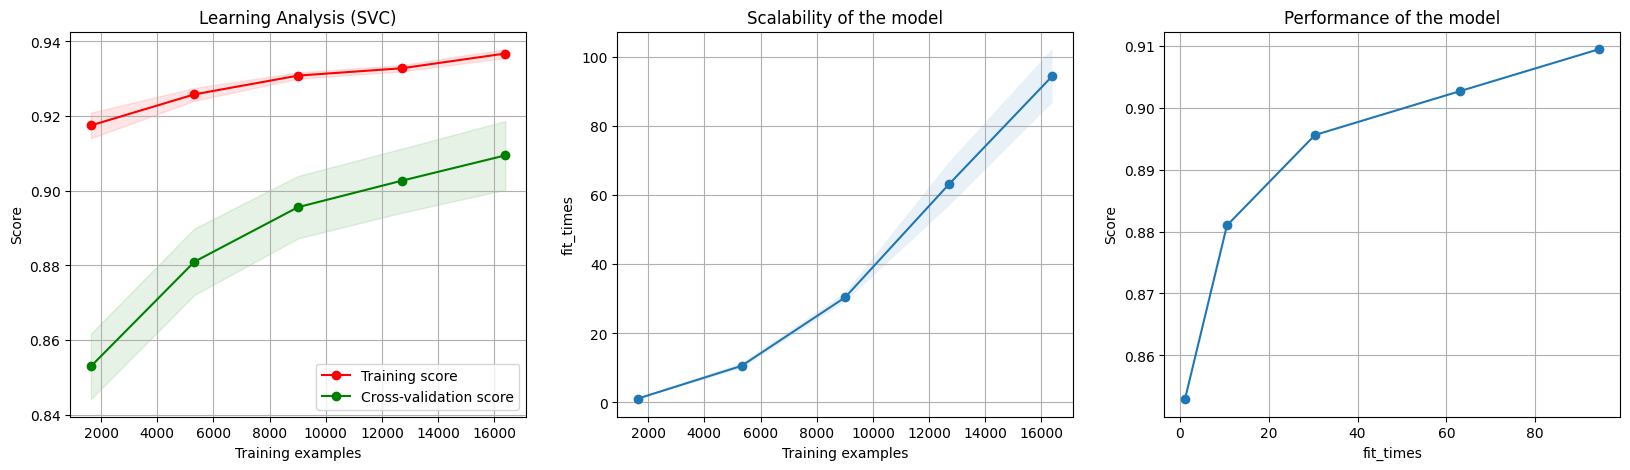

--------------------------------------------------

--- Processing Model: ExtraTreesClassifier (Internal Validation with SMOTE) ---


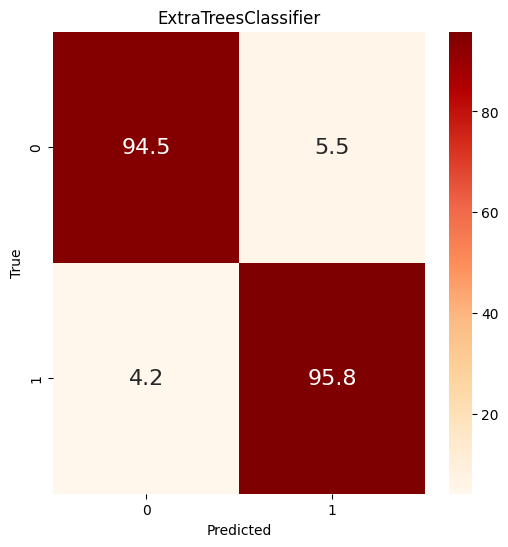

Generating learning curve for ExtraTreesClassifier...


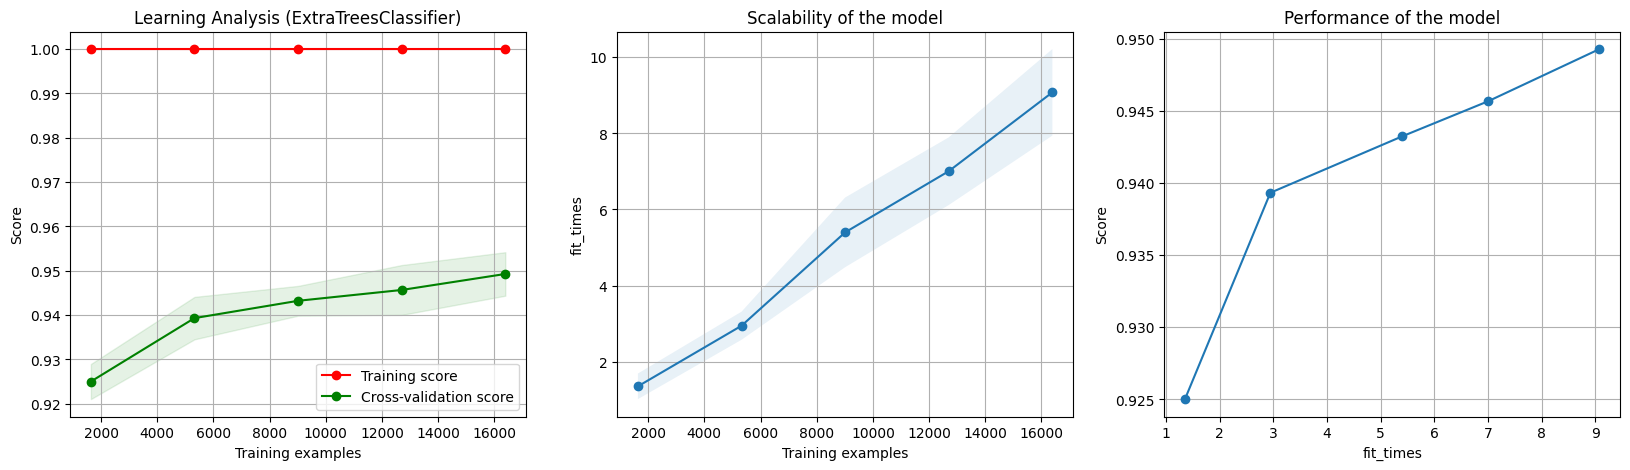

--------------------------------------------------

--- Processing Model: LGBMClassifier (Internal Validation with SMOTE) ---
[LightGBM] [Info] Number of positive: 9218, number of negative: 9217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16261
[LightGBM] [Info] Number of data points in the train set: 18435, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500027 -> initscore=0.000108
[LightGBM] [Info] Start training from score 0.000108
[LightGBM] [Info] Number of positive: 9218, number of negative: 9217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

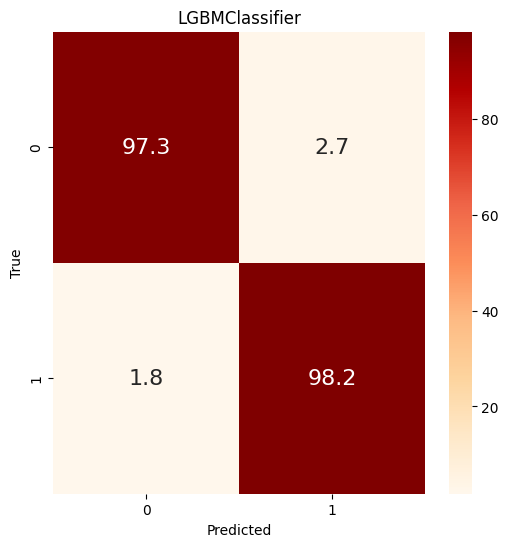

Generating learning curve for LGBMClassifier...


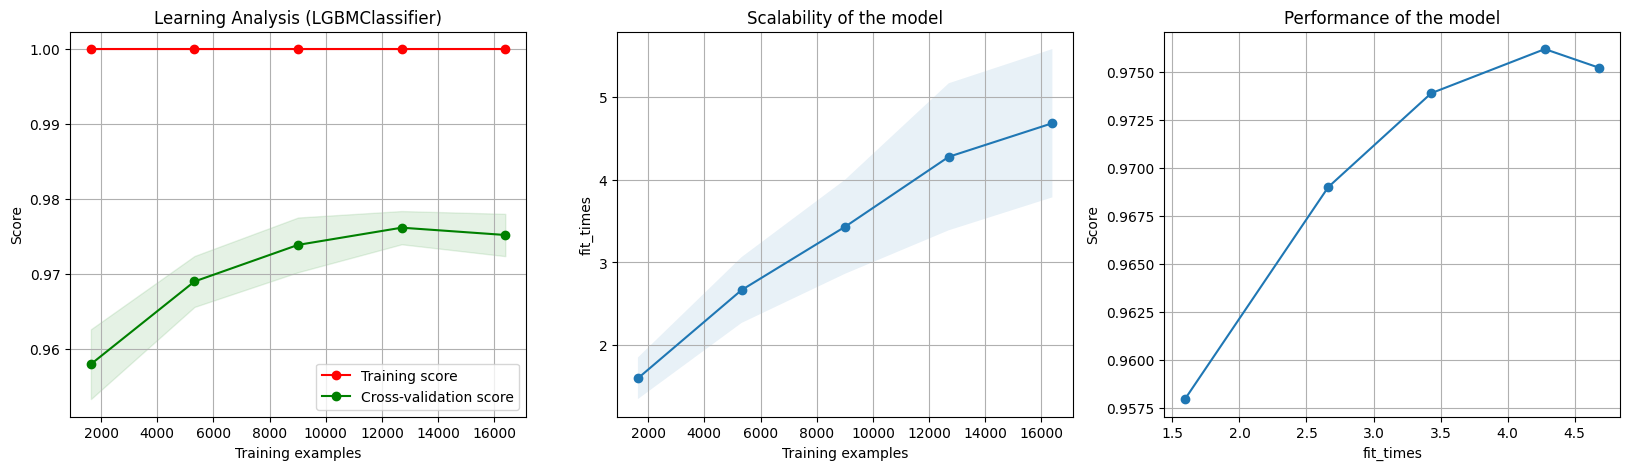

Generating SHAP plots for LGBMClassifier...


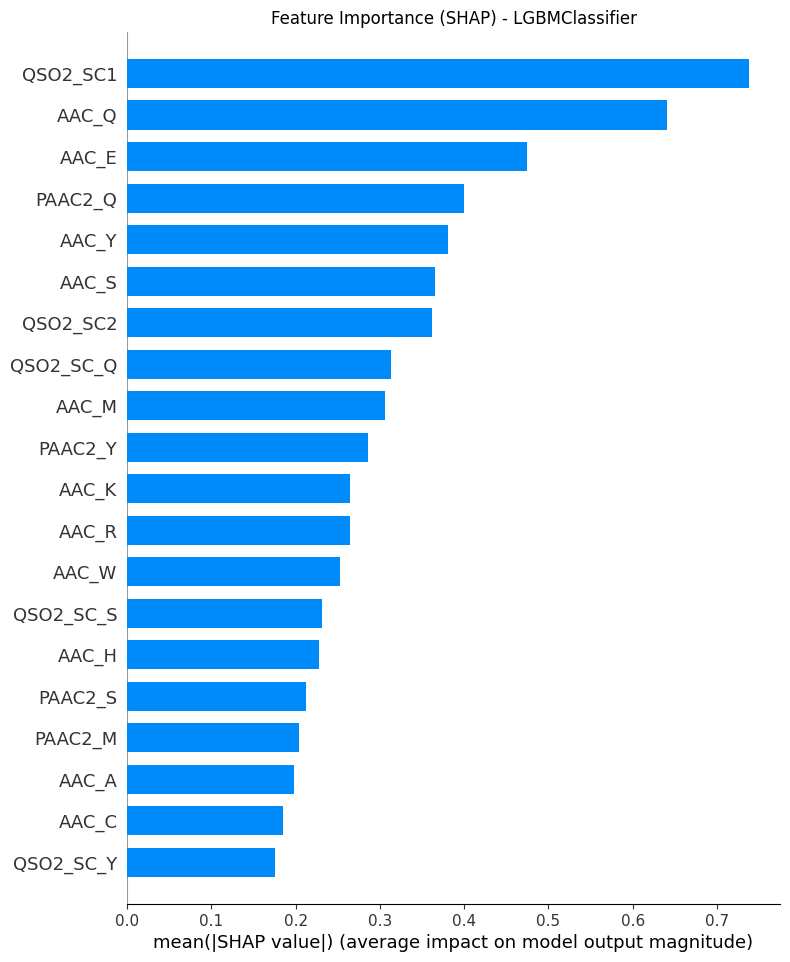

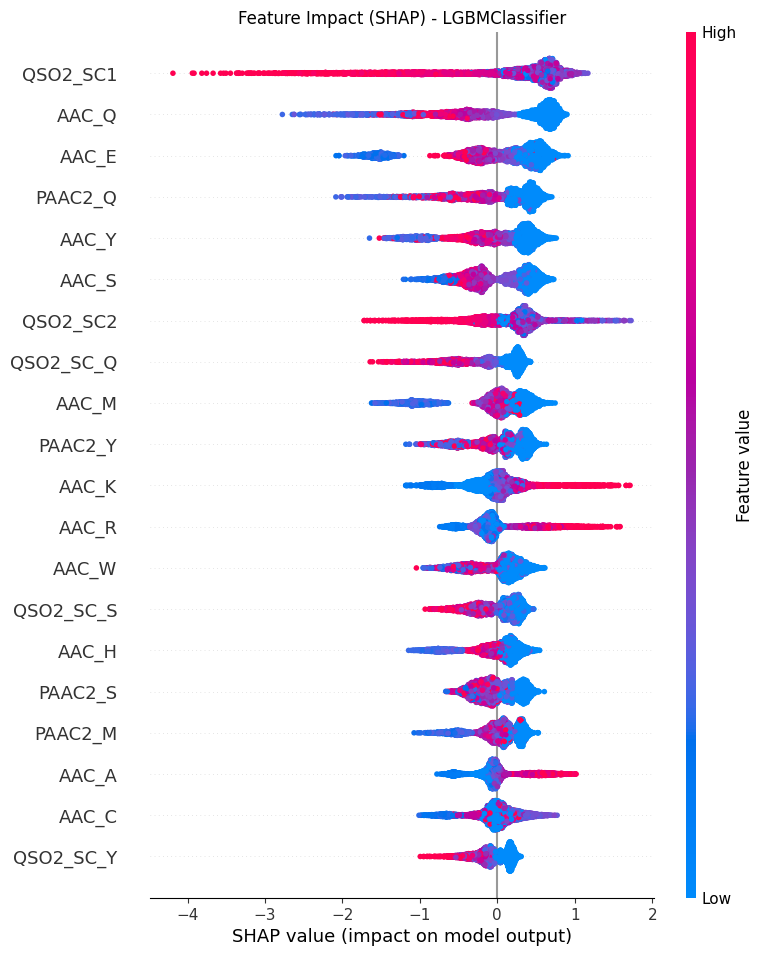

--------------------------------------------------

--- Processing Model: GradientBoostingClassifier (Internal Validation with SMOTE) ---


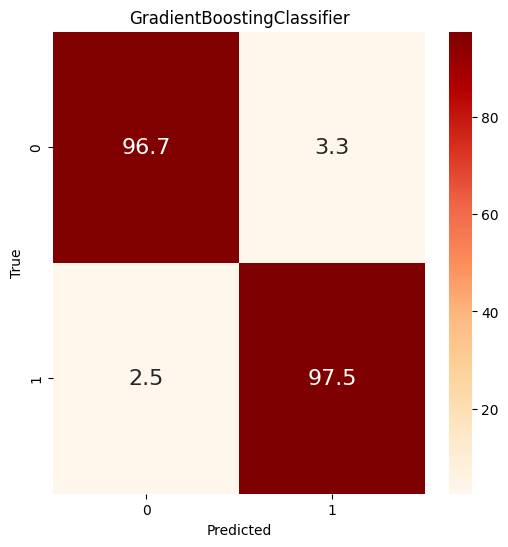

Generating learning curve for GradientBoostingClassifier...


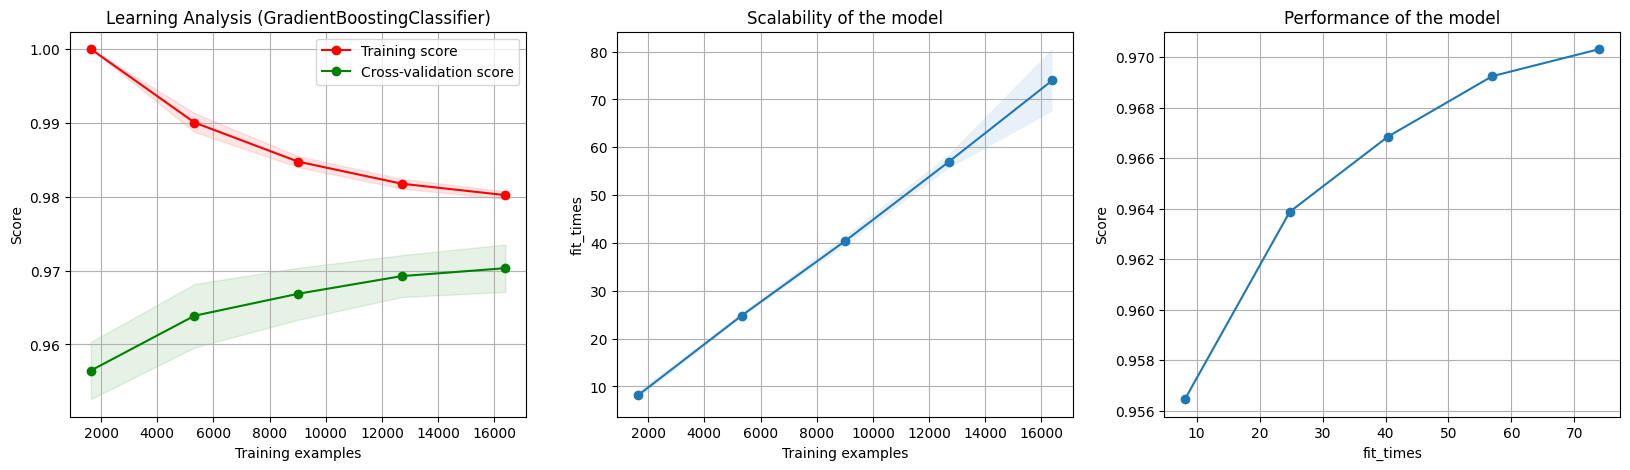

--------------------------------------------------

--- Processing Model: GaussianNB (Internal Validation with SMOTE) ---


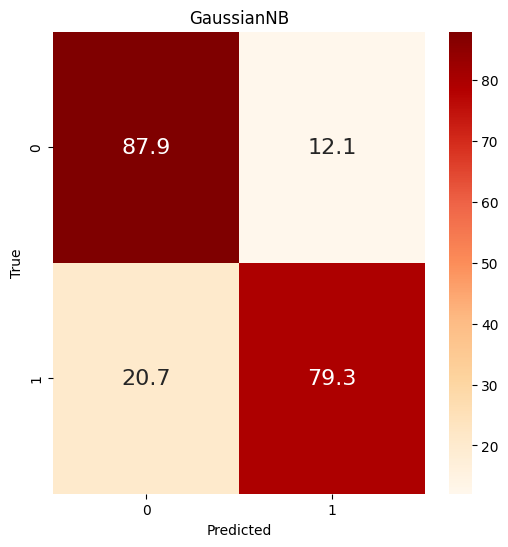

Generating learning curve for GaussianNB...


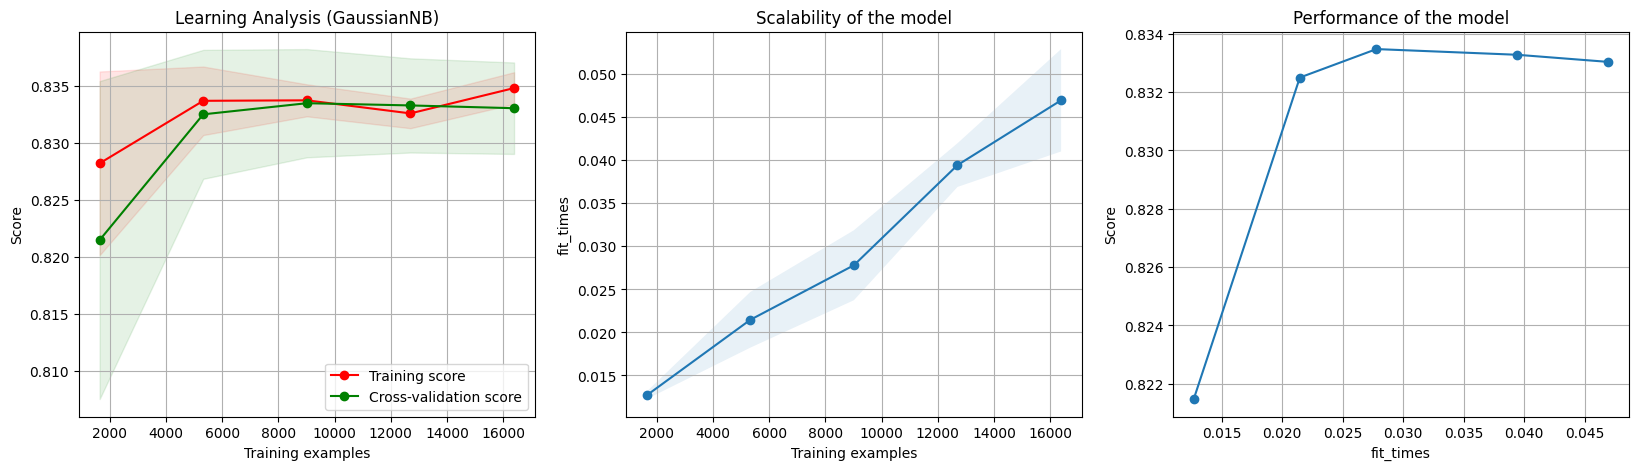

--------------------------------------------------


--- Overall Internal Model Performance Summary (with SMOTE) ---


,Model,CV_Highest,CV_Lowest,CV_Mean,Accuracy,Precision,Recall,F1 Score,AUC,Kappa,Execution Time
0,RandomForestClassifier,0.955566,0.938019,0.946008,0.946119,0.951518,0.942601,0.947038,0.987305,0.892207,22.628962
1,LogisticRegression,0.832520,0.797950,0.817957,0.816005,0.831647,0.802421,0.816773,0.902882,0.632122,17.402870
2,XGBClassifier,0.982422,0.969741,0.976079,0.976053,0.973245,0.980086,0.976654,0.997048,0.952074,56.910822
3,KNeighborsClassifier,0.796875,0.784668,0.790861,0.787867,0.958384,0.611480,0.746603,0.907322,0.578977,5.459457
4,MLPClassifier,0.937531,0.912640,0.922525,0.922969,0.931719,0.916439,0.924016,0.977129,0.845921,344.507461
5,SVC,0.919473,0.899951,0.911785,0.911794,0.914677,0.912534,0.913604,0.972103,0.823511,865.218482
6,ExtraTreesClassifier,0.960449,0.941435,0.950840,0.951906,0.948223,0.958219,0.953195,0.989834,0.903741,72.163209
7,LGBMClassifier,0.981934,0.969253,0.976031,0.977450,0.974051,0.982038,0.978028,0.997451,0.954869,33.143330
8,GradientBoostingClassifier,0.974121,0.959980,0.969098,0.971064,0.968944,0.974619,0.971773,0.996350,0.942091,632.636870
9,GaussianNB,0.844727,0.820888,0.833871,0.835362,0.872852,0.793440,0.831254,0.923280,0.671240,0.405664



--- Statistical Test Results (Paired t-tests on CV Accuracy vs LGBMClassifier) ---


,Model 1,Model 2,Test,Statistic,P-value,Significant
0,LGBMClassifier,RandomForestClassifier,Paired t-test,17.959422,2.340639e-08,True
1,LGBMClassifier,LogisticRegression,Paired t-test,62.479144,3.476672e-13,True
2,LGBMClassifier,XGBClassifier,Paired t-test,-0.063177,9.510066e-01,False
3,LGBMClassifier,KNeighborsClassifier,Paired t-test,108.915031,2.353602e-15,True
4,LGBMClassifier,MLPClassifier,Paired t-test,24.305188,1.617014e-09,True
5,LGBMClassifier,SVC,Paired t-test,31.888359,1.440538e-10,True
6,LGBMClassifier,ExtraTreesClassifier,Paired t-test,23.030167,2.607948e-09,True
7,LGBMClassifier,GradientBoostingClassifier,Paired t-test,10.529605,2.324992e-06,True
8,LGBMClassifier,GaussianNB,Paired t-test,73.138032,8.444902e-14,True


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import shap
import warnings
from scipy.stats import ttest_rel, wilcoxon

# Scikit-learn Models and Utilities
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, auc, confusion_matrix, cohen_kappa_score)

# Classifiers
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# Imbalance-learn for SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# ==============================================================================
# 1. DATA LOADING AND RIGOROUS PREPROCESSING
# ==============================================================================

# Use the correctly merged dataframe
df_pos = merged_full_data[merged_full_data['Target'] == 1.0]
df_neg = merged_full_data[merged_full_data['Target'] == 0.0]


train_pos, test_pos = train_test_split(df_pos, test_size=0.2, random_state=10, stratify=df_pos['Target'])
train_neg, test_neg = train_test_split(df_neg, test_size=0.2, random_state=10, stratify=df_neg['Target'])

train_df = pd.concat([train_pos, train_neg]).sample(frac=1, random_state=10).reset_index(drop=True)
test_df = pd.concat([test_pos, test_neg]).sample(frac=1, random_state=10).reset_index(drop=True)

print(f"\nFinal internal train set shape: {train_df.shape}")
print(f"Final internal test set shape: {test_df.shape}")
print("\nFinal internal train set class counts:\n", train_df['Target'].value_counts())

# ==============================================================================
# 2. APPLY SMOTE FOR DATA BALANCING
# ==============================================================================

print("\n--- Applying SMOTE to the internal training data ---")
sm = SMOTE(random_state=42)
X_train_unbalanced = train_df.drop('Target', axis=1)
y_train_unbalanced = train_df['Target']
X_smote, y_smote = sm.fit_resample(X_train_unbalanced, y_train_unbalanced)

# Create a new DataFrame from the SMOTE-resampled data
smoted_train_df = X_smote.copy()
smoted_train_df['Target'] = y_smote

print(f"Original training data shape: {train_df.shape}")
print(f"SMOTE-resampled training data shape: {smoted_train_df.shape}")
print("SMOTE-resampled class counts:\n", smoted_train_df['Target'].value_counts())

# ==============================================================================
# 3. MODEL AND ANALYSIS DEFINITIONS
# ==============================================================================

# Define a list of models to be evaluated
models = [
    RandomForestClassifier(n_estimators=20, random_state=42),
    LogisticRegression(C=0.001, penalty='l2', max_iter=1000, random_state=42),
    XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    KNeighborsClassifier(n_neighbors=5),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    SVC(kernel='rbf', C=1, gamma='scale', random_state=42, probability=True),
    ExtraTreesClassifier(n_estimators=200, random_state=42),
    LGBMClassifier(n_estimators=200, random_state=42),
    GradientBoostingClassifier(n_estimators=200, random_state=42),
    GaussianNB()
]

# Define the output directory for saving plots and results
output_dir = '/content/drive/MyDrive/Research/Anti-Viral_Peptides/Version 4.0 (Review 2)/Results/Merge/'

# Create an empty DataFrame to store INTERNAL validation results
internal_results_df = pd.DataFrame(columns=['Model', 'CV_Highest', 'CV_Lowest', 'CV_Mean', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Kappa', 'Execution Time'])
roc_plot_data = []
cv_scores_dict = {}

# --- Learning Curve Plotting Function ---
def plot_learning_curve_analysis(estimator, title, X, y, axes=None, ylim=None, cv=None,
                                 n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    return plt

# ==============================================================================
# 4. INTERNAL MODEL VALIDATION LOOP (on smoted_train_df and test_df)
# ==============================================================================

# Use the SMOTE-resampled data for training
X_internal_train = smoted_train_df.drop('Target', axis=1)
y_internal_train = smoted_train_df['Target']
X_internal_test = test_df.drop('Target', axis=1)
y_internal_test = test_df['Target']

for model in models:
    model_name = type(model).__name__
    print(f"--- Processing Model: {model_name} (Internal Validation with SMOTE) ---")
    start_time = time.time()

    # The cross-validation here is on the already SMOTE-resampled data
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_internal_train, y_internal_train, cv=skf, scoring='accuracy')
    cv_scores_dict[model_name] = cv_scores

    model.fit(X_internal_train, y_internal_train)
    predictions = model.predict(X_internal_test)
    y_scores = model.predict_proba(X_internal_test)[:, 1]

    # Collect performance metrics
    accuracy = accuracy_score(y_internal_test, predictions)
    precision = precision_score(y_internal_test, predictions)
    recall = recall_score(y_internal_test, predictions)
    f1 = f1_score(y_internal_test, predictions)
    kappa = cohen_kappa_score(y_internal_test, predictions)
    roc_auc = auc(roc_curve(y_internal_test, y_scores)[0], roc_curve(y_internal_test, y_scores)[1])

    end_time = time.time()
    execution_time = end_time - start_time

    new_result = pd.DataFrame([{'Model': model_name, 'CV_Highest': cv_scores.max(), 'CV_Lowest': cv_scores.min(), 'CV_Mean': cv_scores.mean(), 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC': roc_auc, 'Kappa': kappa, 'Execution Time': execution_time}])
    internal_results_df = pd.concat([internal_results_df, new_result], ignore_index=True)

    # --- Confusion Matrix Plot ---
    cf_matrix = confusion_matrix(y_internal_test, predictions)
    cf_matrix_percent = cf_matrix / np.sum(cf_matrix, axis=1)[:, np.newaxis] * 100
    plt.figure(figsize=(6, 6))
    sns.heatmap(cf_matrix_percent, annot=True, fmt=".1f", cmap='OrRd', annot_kws={"size": 16})
    plt.title(f'{model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'{output_dir}internal_confusion_matrix_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # --- Learning Curve Analysis ---
    print(f"Generating learning curve for {model_name}...")
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    plot_learning_curve_analysis(model, f"Learning Analysis ({model_name})", X_internal_train, y_internal_train, axes=axes, cv=5, n_jobs=-1)
    plt.savefig(f'{output_dir}learning_curve_{model_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # --- SHAP Feature Importance and Explainability ---
    if isinstance(model, LGBMClassifier):
        print(f"Generating SHAP plots for {model_name}...")
        try:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_internal_test)
            shap_values_for_plot = shap_values[1] if isinstance(shap_values, list) else shap_values

            shap.summary_plot(shap_values_for_plot, X_internal_test, plot_type="bar", show=False)
            plt.title(f'Feature Importance (SHAP) - {model_name}')
            plt.savefig(f'{output_dir}feature_importance_summary_bar_{model_name}.png', dpi=300, bbox_inches='tight')
            plt.show()

            shap.summary_plot(shap_values_for_plot, X_internal_test, show=False)
            plt.title(f'Feature Impact (SHAP) - {model_name}')
            plt.savefig(f'{output_dir}feature_importance_summary_beeswarm_{model_name}.png', dpi=300, bbox_inches='tight')
            plt.show()
        except Exception as e:
            print(f"Could not generate SHAP plots for {model_name}. Reason: {e}")
    print("-" * 50 + "\n")

# ==============================================================================
# 5. FINAL RESULTS AND STATISTICAL TESTS
# ==============================================================================

print("\n--- Overall Internal Model Performance Summary (with SMOTE) ---")
display(internal_results_df)

print("\n--- Statistical Test Results (Paired t-tests on CV Accuracy vs LGBMClassifier) ---")
statistical_test_results_ttest = pd.DataFrame(columns=['Model 1', 'Model 2', 'Test', 'Statistic', 'P-value', 'Significant'])
lgbm_scores = cv_scores_dict.get('LGBMClassifier')
if lgbm_scores is not None:
    for model_name, scores in cv_scores_dict.items():
        if model_name != 'LGBMClassifier' and len(lgbm_scores) == len(scores):
            try:
                statistic, p_value = ttest_rel(lgbm_scores, scores)
                is_significant = p_value < 0.05
                new_row = pd.DataFrame([{'Model 1': 'LGBMClassifier', 'Model 2': model_name, 'Test': "Paired t-test", 'Statistic': statistic, 'P-value': p_value, 'Significant': is_significant}])
                statistical_test_results_ttest = pd.concat([statistical_test_results_ttest, new_row], ignore_index=True)
            except ValueError:
                pass
display(statistical_test_results_ttest)